<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/categories_As_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment to show usefulness of Categorical Embeddings

## OHE

In [1]:
# 1.0 Call libraries
import numpy as np
import pandas as pd
# 1.1 Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
# 1.2 sklearn for scaling data
from sklearn.preprocessing import MinMaxScaler
# 1.3 For plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
# 1.4 Misc
import os

In [2]:
# 1.0.1
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# 1.0.2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Data

In [7]:
# 2.0 Read and show  bikesharing data

os.chdir("/content/drive/MyDrive/fa")
data_df = pd.read_csv('/content/drive/MyDrive/fa/bike_sharing_daily.csv.zip', encoding='latin')
data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# 2.1 Data types
data_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Display impt data features

In [9]:
# 2.2 Simple 'groupby()'' example. Only numeric columns will be summed up
df = pd.DataFrame(
                   { 'a': [1,2,3,4],
                     'b' : ['a', 'a', 'b','b'],
                     'c' : ['aa','bb','cc','cc'],
                     'd' : [10,11,12,13]
                   }
                 )

df
# Use groupby to aggregate
#  Only numeric columns are aggregated
df.groupby('b').sum()

,a,b,c,d
0,1,a,aa,10
1,2,a,bb,11
2,3,b,cc,12
3,4,b,cc,13


,a,d
b,,
a,3,21
b,7,25


In [10]:
# 3. To simplify matters, We will concern ourselves to just two columns
#    Extract from our data, only two columns
data_small_df = data_df[['cnt','mnth']]
data_small_df.head() 
data_small_df.tail() 


,cnt,mnth
0,985,1
1,801,1
2,1349,1
3,1562,1
4,1600,1


,cnt,mnth
726,2114,12
727,3095,12
728,1341,12
729,1796,12
730,2729,12


In [11]:
# 3.1 Order this dataset by mnth (maybe it is already ordered. Just make doubly sure)
data_small_df = data_small_df.sort_values(by=['mnth'])
data_small_df.head()
data_small_df.tail()

,cnt,mnth
0,985,1
368,2368,1
369,3272,1
370,4098,1
371,4521,1


,cnt,mnth
361,2302,12
362,2423,12
363,2999,12
350,2739,12
730,2729,12


In [12]:
# 3.2 groupby with 'as_index = True'. 'mnth' comes as an index. This is default.
data_plot = data_small_df.groupby('mnth', as_index = True).agg('sum')
data_plot

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


In [13]:
# 3.3 groupby with 'as_index = False'. This time 'mnth' is a column
data_plot = data_small_df.groupby('mnth', as_index = False).sum()
data_plot

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


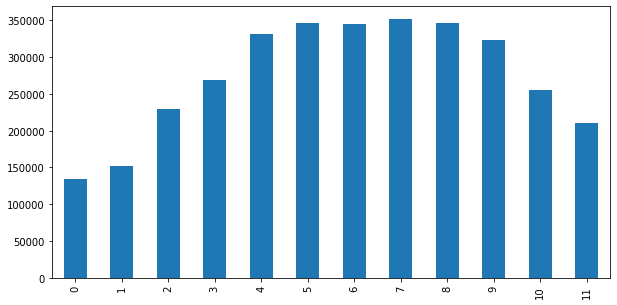

In [14]:
# 3.4 Plot the 'cnt' column of this dataset
#     Certain months have same behaviour
data_plot['cnt'].plot.bar(figsize=(10,5))

In [15]:
# 3.5 Scale the 'cnt' column:

scaler = MinMaxScaler()
data_small_df['cnt_Scaled'] = scaler.fit_transform(data_small_df[['cnt']])
data_small_df.head()

,cnt,mnth,cnt_Scaled
0,985,1,0.110792
368,2368,1,0.269903
369,3272,1,0.373907
370,4098,1,0.468937
371,4521,1,0.517602


# Traditional Embeddings
One Hot Encodings

In [16]:
# 4.0 Transform 'mnth' column to dummy variable using pandas get_dummies()

pd.get_dummies(data_small_df['mnth']).head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
368,1,0,0,0,0,0,0,0,0,0,0,0
369,1,0,0,0,0,0,0,0,0,0,0,0
370,1,0,0,0,0,0,0,0,0,0,0,0
371,1,0,0,0,0,0,0,0,0,0,0,0


# Deep Embedding
Discovering relationships

In [17]:
# 4.1 Number of unique months:

data_small_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [18]:
# 4.2 Just little transformation:

data_small_df['mnth'] = data_small_df['mnth']-1
data_small_df['mnth'] = data_small_df['mnth'].astype(int)

In [19]:
# 5.0 Getting embeddings for months now.
#     We use a simple NN:

embedding_size = 3
# 5.1 Our sequence input_length in each cell (per row) is just 1.
#     So  input_length = 1
model = Sequential()
model.add(Embedding(input_dim = 12,               # Vocabulary size of 12
                    output_dim = embedding_size,  # Vector size of 3
                    input_length = 1,             # A category, such as: ['sharp knife' ] 
                                                  # would have input_length of 2. But, 
                                                  # a category such as: ['knife'] would have
                                                  #  input_length of 1.
                    name="embedding"              # Layer name. We will later access it by this name
                   )
         )
model.add(Flatten())                        # Needs flattening as output is (embedding_size,1)
model.add(Dense(50, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1))

In [20]:
# 5.1.1
model.compile(loss = "mse",
              optimizer = "adam",
              metrics=["accuracy"]
              )


# 5.1.2
model.fit(x = data_small_df['mnth'].values,
          y=  data_small_df['cnt_Scaled'].values,
          epochs = 50,
          batch_size = 4
         )

Epoch 1/50
183/183 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.0014
Epoch 2/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.0014
Epoch 3/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.0014
Epoch 4/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.0014
Epoch 5/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.0014
Epoch 6/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.0014
Epoch 7/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.0014
Epoch 8/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.0014
Epoch 9/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.0014
Epoch 10/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.0014

In [21]:
# 5.2 Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 3)              36        
                                                                 
 flatten (Flatten)           (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 50)                200       
                                                                 
 dense_1 (Dense)             (None, 15)                765       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,017
Trainable params: 1,017
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 6.0 Get embeddings layer weights
# 6.0.1 First get the 'layer' object
layer = model.get_layer('embedding')


# 6.0.2 Then get this layer's attributes
output_embeddings = layer.get_weights()

In [23]:
# 6.0.3
type(output_embeddings)     # It is a list that contains one array
print("\n=====")
print(len(output_embeddings))  # 1

list


=====
1


In [24]:
# 6.1
output_embeddings[0]     # Our weights array
print("\n============")
output_embeddings[0].shape  # (12,3)

array([[ 0.16662988,  0.01871658,  0.19070278],
       [ 0.13384628,  0.02709166,  0.11561958],
       [ 0.01106033, -0.02490225,  0.0549031 ],
       [-0.03054546,  0.02953362, -0.01951191],
       [-0.06711937, -0.00811521, -0.11355954],
       [-0.13009284,  0.01681714, -0.13006212],
       [-0.08868358,  0.00465832, -0.13621555],
       [-0.10076675,  0.02138255, -0.13054799],
       [-0.15390669, -0.01842876, -0.11575412],
       [-0.07380715,  0.01107316, -0.09282355],
       [-0.01185911, -0.02852709,  0.0045522 ],
       [ 0.06165524,  0.03442408,  0.05856368]], dtype=float32)

(12, 3)

In [25]:
# 6.2 Transform array to dataframe
output_embeddings_df = pd.DataFrame(output_embeddings[0])
output_embeddings_df

,0,1,2
0,0.166630,0.018717,0.190703
1,0.133846,0.027092,0.115620
2,0.011060,-0.024902,0.054903
3,-0.030545,0.029534,-0.019512
4,-0.067119,-0.008115,-0.113560
5,-0.130093,0.016817,-0.130062
6,-0.088684,0.004658,-0.136216
7,-0.100767,0.021383,-0.130548
8,-0.153907,-0.018429,-0.115754
9,-0.073807,0.011073,-0.092824


In [26]:
# 6.3 Existing index becomes a column and a new index is added
output_embeddings_df.reset_index()

,index,0,1,2
0,0,0.166630,0.018717,0.190703
1,1,0.133846,0.027092,0.115620
2,2,0.011060,-0.024902,0.054903
3,3,-0.030545,0.029534,-0.019512
4,4,-0.067119,-0.008115,-0.113560
5,5,-0.130093,0.016817,-0.130062
6,6,-0.088684,0.004658,-0.136216
7,7,-0.100767,0.021383,-0.130548
8,8,-0.153907,-0.018429,-0.115754
9,9,-0.073807,0.011073,-0.092824


In [27]:
# 6.4 reset_index() and update data frame
output_embeddings_df = output_embeddings_df.reset_index()
output_embeddings_df.shape   # (12,4)

(12, 4)

In [28]:
# 6.5 Name columns
output_embeddings_df.columns = ['mnth', 'embedding_1', 'embedding_2', 'embedding_3']
output_embeddings_df

,mnth,embedding_1,embedding_2,embedding_3
0,0,0.166630,0.018717,0.190703
1,1,0.133846,0.027092,0.115620
2,2,0.011060,-0.024902,0.054903
3,3,-0.030545,0.029534,-0.019512
4,4,-0.067119,-0.008115,-0.113560
5,5,-0.130093,0.016817,-0.130062
6,6,-0.088684,0.004658,-0.136216
7,7,-0.100767,0.021383,-0.130548
8,8,-0.153907,-0.018429,-0.115754
9,9,-0.073807,0.011073,-0.092824


# Vizualisation
Visualization of relationships

In [29]:
# 6.6 Get three embeddings columns
output_embeddings_df.iloc[:,1:]

,embedding_1,embedding_2,embedding_3
0,0.166630,0.018717,0.190703
1,0.133846,0.027092,0.115620
2,0.011060,-0.024902,0.054903
3,-0.030545,0.029534,-0.019512
4,-0.067119,-0.008115,-0.113560
5,-0.130093,0.016817,-0.130062
6,-0.088684,0.004658,-0.136216
7,-0.100767,0.021383,-0.130548
8,-0.153907,-0.018429,-0.115754
9,-0.073807,0.011073,-0.092824


Text(0.16662988, 0.018716585, '0')

Text(0.13384628, 0.027091658, '1')

Text(0.011060327, -0.024902252, '2')

Text(-0.030545464, 0.029533623, '3')

Text(-0.067119375, -0.008115213, '4')

Text(-0.13009284, 0.016817143, '5')

Text(-0.088683575, 0.0046583177, '6')

Text(-0.10076675, 0.021382548, '7')

Text(-0.15390669, -0.018428763, '8')

Text(-0.07380715, 0.011073164, '9')

Text(-0.011859109, -0.028527094, '10')

Text(0.06165524, 0.034424078, '11')

Text(0.5, 0, 'Embedding 1')

Text(0.5, 0, 'Embedding 2')

Text(0.5, 0, 'Embedding 3')

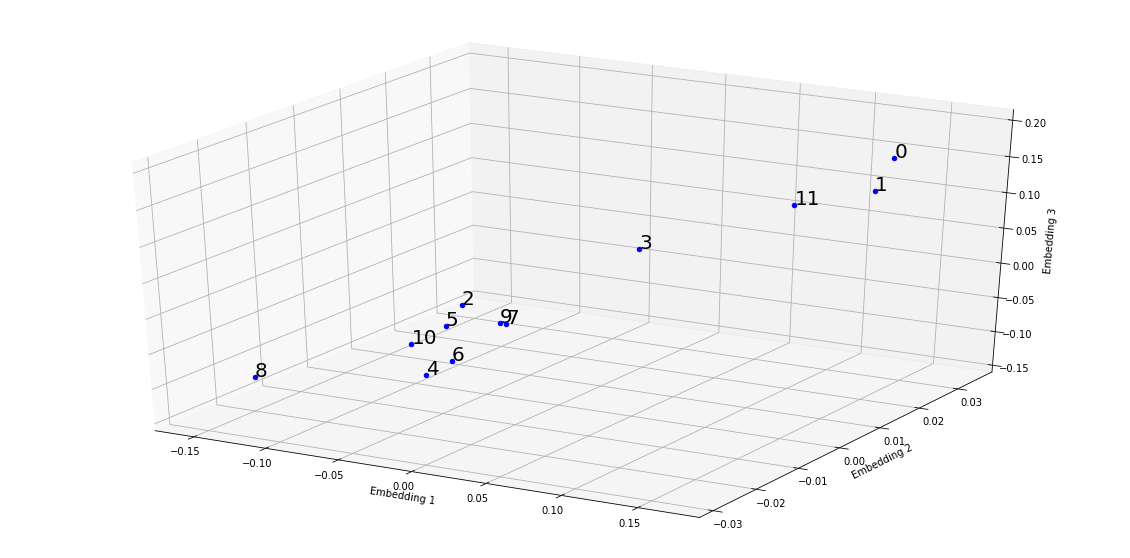

In [30]:
# 7.0 Plot each vector on 3D axis
m = output_embeddings_df.iloc[:,1:].values
labels = output_embeddings_df.iloc[:,0:1].values
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    ax.scatter(m[i,0],m[i,1],m[i,2], color='b')
    ax.text(m[i,0],m[i,1],m[i,2],'%s'%(str(labels[i][0])), size=20, zorder=1, color='k')

ax.set_xlabel('Embedding 1')  
ax.set_ylabel('Embedding 2')  
ax.set_zlabel('Embedding 3')  
plt.show()

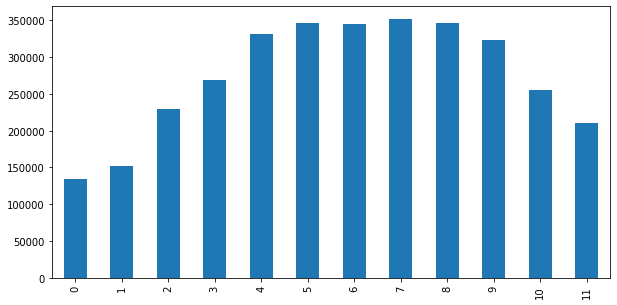

In [31]:
data_plot['cnt'].plot.bar(figsize=(10,5))